# Styles, Scales, and Shapes

## Styles and Shapes

*Styling* - The styling is handled through something call CSS (Cascading Style Sheets), but we can specifically handle this within our D3.js code. Here is a list of typical style changes. 
* fill - the color inside the shape
* stroke - the border of the shape
* opacity - the transparency of the shape
* Note: there are more combinations, but these are the basics and covers a good amount of styling.

*Shapes* - At this point, we have been using circles primarily for out designs. There are few other shapes we need to cover and what is needed to draw these.
* Circles ("circle") - cx, cy, r
* Rectangles ("rect") - x, y, width, height
* Line ("line") - x1, y1, x2, y2
* Text ("text") - x, y
* Paths ("path") - these are by far the most complicate shapes, and will require further discussion throughout these notebooks
* Note: There are ellipse, polylines, and polygons, but these are RARELY used in D3.js
. 

First things, first... Let's bring back our last project for Part 2.

In [1]:
from IPython.display import  HTML

def load_d3_in_cell_output():
  display(HTML("<script src='https://d3js.org/d3.v6.min.js'></script>"))
get_ipython().events.register('pre_run_cell', load_d3_in_cell_output)

```javascript
const dataset = [3, 5, 5, 6, 15, 18]
```

In [2]:
%%html
<div id="gohere1"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var dataset = [3, 5, 5, 6, 15, 18]
    
    var svg = d3.select("div#gohere1").append("svg")
        .attr("width", width)
        .attr("height", height)
    
  svg.selectAll("circle")
    .data(dataset)
    .join("circle")
    .attr("cx", (d,i)=> i*30)
    .attr("cy", (d,i)=> height - (i*20))
    .attr("r", (d,i)=> d)
</script>

In the above example, we used .attr(ibute) for the attributes of the given shape. We can use another function called .style() to add the CSS styling directly to the shape.

For our first example, we make these *purple circles with a black border that is 3 px in width*

In [3]:
%%html
<div id="gohere2"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var dataset = [3, 5, 5, 6, 15, 18]
    
    var svg = d3.select("div#gohere2").append("svg")
        .attr("width", width)
        .attr("height", height)
    
  svg.selectAll("circle")
    .data(dataset)
    .join("circle")
    .attr("cx", (d,i)=> i*30)
    .attr("cy", (d,i)=> height - (i*20))
    .attr("r", (d,i)=> d)
    .style("fill", "purple")
    .style("stroke", "black")
    .style("stroke-width", 3) // reminder, this means 3 pixels

</script>

**Your Turn** - Create the 6 circles with the stroke: blue, stroke-width: 5px, and fill: lightgrey

In [4]:
%%html
<div id="gohere3"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var dataset = [3, 5, 5, 6, 15, 18]
    
    var svg = d3.select("div#gohere3").append("svg")
        .attr("width", width)
        .attr("height", height)
    
  svg.selectAll("circle")
    .data(dataset)
    .join("circle")
    .attr("cx", (d,i)=> i*30)
    .attr("cy", (d,i)=> height - (i*20))
    .attr("r", (d,i)=> d)
    .style("fill", "lightgrey")
    .style("stroke", "blue")
    .style("stroke-width", 5) // reminder, this means 3 pixels
</script>

Again, the cool thing about D3.js is that we can use the data to style as well. Here is the same plot, but the stroke-width will be the value of our data set.

In [5]:
%%html
<div id="gohere4"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var dataset = [3, 5, 5, 6, 15, 18]
    
    const svg = d3.select("div#gohere4").append("svg")
        .attr("width", width)
        .attr("height", height)
    
    svg.selectAll("circle")
        .data(dataset)
        .join("circle")
        .attr("cx", (d,i)=> i*30)
        .attr("cy", (d,i)=> height - (i*20))
        .attr("r", (d,i)=> d)
        .style("fill", "purple")
        .style("stroke", "black")
        .style("stroke-width", (d,i) => i) 
</script>

### Color Scales

For the most part, this is not very helpful. One way to make this more useful is to use color based on our data, or in other words, the darker the color, the larger the value. 

To implement this, I would HIGHLY suggest visit [color-scales](https://github.com/d3/d3-scale-chromatic). As mentioned in the article, the color scales were created using Cynthia A. Brewer’s [ColorBrewer](https://colorbrewer2.org/). ColorBrewer was designed to help designers find color-blind safe and print and copier safe color palette. ColorBrewer is my (and several other programming languages) “go-to” color palette.

For this, I will be choosing the Sequential (Single Hue) - Purple color. For these color palettes, they are expecting a value between 0 to 1, where 0 is the far-left of the color palette, the far-right is 1.

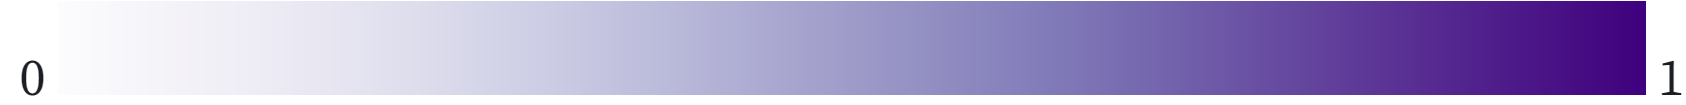

For now, to get our values between 0 and 1. I will take the largest value in our array (dataset, which is 18) and divide all of our values by this. Meaning, 3 will become 3/18, 5 will be 5/18 and so on.

In [6]:
%%html
<div id="gohere5"></div>

<script type="text/javascript">   

    var width = 300
    var height = 300
    var dataset = [3, 5, 5, 6, 15, 18]
    var palette =  d3.interpolatePurples
    
    var svg = d3.select("div#gohere5").append("svg")
        .attr("width", width)
        .attr("height", height)
    
    svg.selectAll("circle")
        .data(dataset)
        .join("circle")
        .attr("cx", (d,i)=> i*30)
        .attr("cy", (d,i)=> height - (i*20))
        .attr("r", (d,i)=> d)
        .style("fill", (d,i) => palette(d/18))
        .style("stroke", "black")
        .style("stroke-width", 2) 

</script>

Cool! We have some color! Though, we want to setup a way for our data to fit the 0 to 1 range withOUT needing us to manaully adding the largest value. There is a way to do this using [scaling](https://github.com/d3/d3-scale). Scaling allows use to create a range of values based on our data set. There are multiple types of scaling.For continuous data, or data with numeric values (Linear, Power, Log, Identity, Time, Radial). There are types of scaling, but for now we will focus on these.

### Scale Linear (d3.scaleLinear)

Let's start by creating a scaling function called between0and1. To do this we will need two things:
* the **.domain()** which is the lowest and highest number that will be given to the function. This is usually the smallest number in our array or 3, and largest number, 18. 
* the **.range()** is the range of values we want to map to, as in we want all numbers to be within 0 to 1. 

Our smallest number (3), will be mapped 0 and our largest number (18) mapped to 1.

In [7]:
%%html
<figure>
<video width="480" height="240" controls muted >
  <source src="https://github.com/dudaspm/d3plotbook/blob/main/Styles_Scales_Shapes_video.mp4?raw=true" type=video/mp4>
</video>
  <figcaption>(No Audio) Figure showing how are list [5,3,16,5,6,18] maps to the domain and range [0,1]</figcaption>
</figure>

In [8]:
%%html
<p id="printout1"></p>
<script>
var dataset = [5, 3, 16, 5, 6, 18]
var between0and1 = d3.scaleLinear().range([0,1]).domain([3,18])
document.getElementById("printout1").innerHTML = between0and1(18)
</script>

Again, though, we are still manually putting these values into our boundries. That's why there are built in functions to help AUTOMAGICALLY find the lowest and highest values in an array. 
* **d3.max()** - finds the max value in the array
* **d3.min()** - finds the min value in the array
* **d3.extent()** - finds both the min and max values in an array

In [9]:
%%html
<p id="printout2"></p>
<script>
var dataset = [5, 3, 16, 5, 6, 18]
document.getElementById("printout2").innerHTML = d3.min(dataset)
</script>

In [10]:
%%html
<p id="printout3"></p>
<script>
var dataset = [5, 3, 16, 5, 6, 18]
document.getElementById("printout3").innerHTML = d3.max(dataset)
</script>

In [11]:
%%html
<p id="printout4"></p>
<script>
var dataset = [5, 3, 16, 5, 6, 18]
document.getElementById("printout4").innerHTML = d3.extent(dataset)
</script>

In [12]:
%%html
<div id="gohere6"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var dataset = [5, 3, 16, 5, 6, 18]
    var palette =  d3.interpolateInferno
    var color = d3.scaleLinear().range([0,1]).domain(d3.extent(dataset))
    
    var svg = d3.select("div#gohere6").append("svg")
        .attr("width", width)
        .attr("height", height)
 
    svg.selectAll("circle")
        .data(dataset)
        .join("circle")
        .attr("cx", (d,i)=> i*30)
        .attr("cy", (d,i)=> height - (i*20))
        .attr("r", (d,i)=> d)
        .style("fill", "lightgrey" )
        .style("stroke", (d,i) => palette(color(d)) )
        .style("stroke-width", 5) 
</script>

<p>So, when to use d3.extent or d3.min/d3.max? This is a good example of this case. Right now, </p>


```javascript
const color = d3.scaleLinear().range([0,1]).domain(d3.extent(dataset))
```


<p>assumes that our lowest number, 3, is mapped to 0. Though, in some cases, we want 0 to be mapped to 0. Meaning we should use</p> 


```javascript
const color = d3.scaleLinear().range([0,1]).domain([0,d3.max(dataset)])
```

In [13]:
%%html
<div id="gohere7"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var dataset = [5, 3, 16, 5, 6, 18]
    var palette =  d3.interpolatePurples
    var color = d3.scaleLinear().range([0,1]).domain([0,d3.max(dataset)])
    
    var svg = d3.select("div#gohere7").append("svg")
        .attr("width", width)
        .attr("height", height)
 
    svg.selectAll("circle")
        .data(dataset)
        .join("circle")
        .attr("cx", (d,i)=> i*30)
        .attr("cy", (d,i)=> height - (i*20))
        .attr("r", (d,i)=> d)
        .style("fill", (d,i) => palette(color(d)) )
        .style("stroke", "black")
        .style("stroke-width", 2) 

</script>


## Shapes

### Rectangles

In [14]:
%%html
<div id="gohere8"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var dataset = [5, 3, 16, 5, 6, 18]
    var palette =  d3.interpolatePurples
    var color = d3.scaleLinear().range([0,1]).domain([0,d3.max(dataset)])
    
    var svg = d3.select("div#gohere8").append("svg")
        .attr("width", width)
        .attr("height", height)
 
    svg.selectAll("rect")
    .data(dataset)
    .join("rect")
    .attr("x", (d,i)=> d*5)
    .attr("y", (d,i)=> height - (i*20))
    .attr("width", 20)
    .attr("height", 20)
    .style("fill", (d,i) => palette(color(d)) )
    .style("stroke", "black")
    .style("stroke-width", 2) 
    .style("stroke-width", 2) 
</script>

For rectangles, the x,y is the origin of the rectangle (again in the top-lefthand corner). Right now, we are missing a rectangle, well, not missing it, it just off the canvas. For data point 3, index 0, the x position is 15, and the y position is the height. Meaning, we need to correct this. Also, we are not using the space very well. This was true with our circles, but let's see if we can fix this issue here as well. The best way to do this is to create margins. For now, let's just set a margin of 30. 30 on the top, bottom, left, and right. We will do this using the scaleLinear function for both the x and y axis.

In [15]:
%%html
<div id="gohere9"></div>

<script type="text/javascript">   

    var width = 300
    var height = 300
    var margin = 30 // Add my margin
    var dataset = [5, 3, 16, 5, 6, 18]
    var palette =  d3.interpolatePurples
    var color = d3.scaleLinear().range([0,1]).domain([0,d3.max(dataset)])
  
    var svg = d3.select("div#gohere9").append("svg")
        .attr("width", width)
        .attr("height", height)    
    
    // Use the margin to create an x domain and range
    var x = d3.scaleLinear().range([margin,width-margin]).domain(d3.extent(dataset)) 

    // Use the margin to create an y domain and range
    var y = d3.scaleLinear().range([height-margin,margin]).domain([0,dataset.length-1])   

    svg.selectAll("rect")
        .data(dataset)
        .join("rect")
        .attr("x", (d,i)=> x(d))
        .attr("y", (d,i)=> y(i))
        .attr("width", 20)
        .attr("height", 20)
        .style("fill", (d,i) => palette(color(d)) )
        .style("stroke", "black")
        .style("stroke-width", 2) 

</script>

### Text

Next, we add some text next to our boxes. For the most part, we will be using the same code as our rectangles. Let's take a look.

In [16]:
%%html
<div id="gohere10"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var margin = 30 // Add my margin
    var dataset = [5, 3, 16, 5, 6, 18]
    var palette =  d3.interpolatePurples
    var color = d3.scaleLinear().range([0,1]).domain([0,d3.max(dataset)])
  
    var svg = d3.select("div#gohere10").append("svg")
        .attr("width", width)
        .attr("height", height)    
    
    // Use the margin to create an x domain and range
    var x = d3.scaleLinear().range([margin,width-margin]).domain(d3.extent(dataset)) 

    // Use the margin to create an y domain and range
    var y = d3.scaleLinear().range([height-margin,margin]).domain([0,dataset.length-1])   

    svg.selectAll("rect")
        .data(dataset)
        .join("rect")
        .attr("x", (d,i)=> x(d))
        .attr("y", (d,i)=> y(i))
        .attr("width", 20)
        .attr("height", 20)
        .style("fill", (d,i) => palette(color(d)) )
        .style("stroke", "black")
        .style("stroke-width", 2) 
    
    // adding in the text 
    svg.selectAll("text")
        .data(dataset)
        .join("text")
        .attr("x", (d,i)=> x(d))
        .attr("y", (d,i)=> y(i))
        .text((d,i) => "x: "+d+" y: "+i)
</script>

Adding in the text, the only additional piece we need to add is what the .text() will be. In this case, I am again using the data to add specific data related text to the screen. If we take a particular look at this function, we can see how we used both text and data together.

<code>.text((d,i) => <span style="color:#008ec4">"x: "</span>+<span style="color:#005f87">d</span>+<span style="color:#008ec4">" y: "</span>+<span style="color:#005f87">i</span>)</code>

Using the "x: ", the plus sign (+), and d will combine or concatenate the two to make one string

The last thing that needs to be adjusted is the fact that both the rectangle and the text occupy the same x,y coordinate, which means they overlap a bit. Also, the text for our last rectangle is off the canvas. So, let's adjust both of these.

In [17]:
%%html
<div id="gohere11"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var margin = 30 // Add my margin
    var dataset = [5, 3, 16, 5, 6, 18]
    var palette =  d3.interpolatePurples
    var color = d3.scaleLinear().range([0,1]).domain([0,d3.max(dataset)])
  
    var svg = d3.select("div#gohere11").append("svg")
        .attr("width", width)
        .attr("height", height)    
    
    // Use the margin to create an x domain and range
    var x = d3.scaleLinear().range([margin,width-margin]).domain(d3.extent(dataset)) 

    // Use the margin to create an y domain and range
    var y = d3.scaleLinear().range([height-margin,margin]).domain([0,dataset.length-1])   

    svg.selectAll("rect")
        .data(dataset)
        .join("rect")
        .attr("x", (d,i)=> x(d))
        .attr("y", (d,i)=> y(i))
        .attr("width", 20)
        .attr("height", 20)
        .style("fill", (d,i) => palette(color(d)) )
        .style("stroke", "black")
        .style("stroke-width", 2) 
    
    // adding in the text 
    svg.selectAll("text")
        .data(dataset)
        .join("text")
        .attr("x", (d,i)=> x(d))
        // moving our text up a bit (subtracting 5 pixels)
        .attr("y", (d,i)=> y(i)-5)
        .text((d,i) => "x: "+d+" y: "+i)
</script>

### Lines

Next, we have lines. Lines are similar to circles, rectangles, and text. You need a starting x,y, and similar to the rectangle you need secondary dimension (width/height), whereas lines need an ending x,y position. I think there can be a misconception about lines, based on “line graphs.” Line graphs (as seen below) look like a single line but fluctuations here and there when a better way to think about lines independent of one another. Paths (talked about next) are where we will be able to think about one, continuous line.

<table>
<tr>
<td>
<img
  src='https://raw.githubusercontent.com/dudaspm/ProjectiOn/master/D3Tutorial/Images/linechart1.PNG'
  width="200" />
</td>
<td>
<img
  src='https://raw.githubusercontent.com/dudaspm/ProjectiOn/master/D3Tutorial/Images/linechart2.PNG'
  width="200" />
</td>
</tr>
<tr>
<td>
Figure 1 - </br>How you might assume the line shape would work.
</td>
<td>
Figure 2 - </br>How the line shape actually works.
</td>
</tr>
</table>

In [18]:
%%html
<div id="gohere12"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var margin = 30 // Add my margin
    var dataset = [5, 3, 16, 5, 6, 18]
    var palette =  d3.interpolatePurples
    var color = d3.scaleLinear().range([0,1]).domain([0,d3.max(dataset)])
  
    var svg = d3.select("div#gohere12").append("svg")
        .attr("width", width)
        .attr("height", height)    
    
    // Use the margin to create an x domain and range
    var x = d3.scaleLinear().range([margin,width-margin]).domain(d3.extent(dataset)) 

    // Use the margin to create an y domain and range
    var y = d3.scaleLinear().range([height-margin,margin]).domain([0,dataset.length-1])   

    // update this to select the lines, then join (or add) lines.
    svg.selectAll("line")
        .data(dataset)
        .join("line")
        // lines require x1,y1 (where the line starts) and x2,y2 (where the lines end)
        .attr("x1", (d,i)=> x(d))
        .attr("y1", (d,i)=> y(i))
        .attr("x2", (d,i)=> x(d)+10)
        .attr("y2", (d,i)=> y(i)+10)
        // to change the color of the line we need to update the stroke, not the fill. 
        .style("stroke", (d,i) => palette(color(d)) )
        .style("stroke-width", 10) 

</script>

To create a line chart from these lines would require several changes. Here is an example of how to do it, but there is a MUCH simpler way using paths, which we will talk about in a second.

In [19]:
%%html
<div id="gohere13"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var margin = 30 // Add my margin
    var dataset = [5, 3, 16, 5, 6, 18]
    var palette =  d3.interpolatePurples
    var color = d3.scaleLinear().range([0,1]).domain([0,d3.max(dataset)])
  
    var svg = d3.select("div#gohere13").append("svg")
        .attr("width", width)
        .attr("height", height)    
    
    // Use the margin to create an x domain and range
    var x = d3.scaleLinear().range([margin,width-margin]).domain(d3.extent(dataset)) 

    // Use the margin to create an y domain and range
    var y = d3.scaleLinear().range([height-margin,margin]).domain([0,dataset.length-1])   

    // update this to select the lines, then join (or add) lines.
    svg.selectAll("line")
        .data(dataset.slice(0, -1))
        .join("line")
        .attr("x1", (d,i)=> x(d))
        .attr("y1", (d,i)=> y(i))
        // we then need to end our line with the next data point.
        // that's why we use (i+1) and why we cutoff the last position in our array
        .attr("x2", (d,i)=> x(dataset[i+1]))
        .attr("y2", (d,i)=> y(i+1))
        .style("stroke", "black" ) // changing this back, as not all the data points (and colors) will be represented
        .style("stroke-width", 10) 
</script>

As you can see, this is not the most elegant way to handle creating a line.

### Paths

Finally, we have paths. Up to this point, we have been focusing on the idea "for each data point, we create a shape or object." Paths require multiple data points to create the shape/object. We can use a function to create our line. We can either do this in a new (separate) cell or in with the code itself. Let's build it in our design. 

In [20]:
%%html
<div id="gohere14"></div>

<script type="text/javascript">   
    var width = 300
    var height = 300
    var margin = 30 // Add my margin
    var dataset = [5, 3, 16, 5, 6, 18]
    var palette =  d3.interpolatePurples
    var color = d3.scaleLinear().range([0,1]).domain([0,d3.max(dataset)])
  
    var svg = d3.select("div#gohere14").append("svg")
        .attr("width", width)
        .attr("height", height)    
    
    // Use the margin to create an x domain and range
    var x = d3.scaleLinear().range([margin,width-margin]).domain(d3.extent(dataset)) 

    // Use the margin to create an y domain and range
    var y = d3.scaleLinear().range([height-margin,margin]).domain([0,dataset.length-1])   

    // this is our function to create the line, where the x is based on the d(ata) and the y on the i(ndex)
    var line = d3.line()
        .x((d,i)=> x(d)) 
        .y((d,i)=> y(i)) 

    svg.selectAll("path")
        .data([dataset])
        .join("path")
        .attr("d", line)
        .style("stroke", "black" )
        .style("stroke-width", 10) 
        .style("fill", "none") // SPECIAL NOTE HERE: we set the fill to "none" because a path will have a fill color

</script>